In [38]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [40]:
# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')

In [42]:
# Drop 'User ID' as it is not useful for prediction
df = df.drop(columns=['User ID'])

In [44]:
# Convert categorical variable 'Gender' into numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)  # 'Gender_Male' will be 1 if Male, 0 if Female

# Separate features and target
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling (important for algorithms like Logistic Regression)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train logistic regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Make predictions on test set
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [46]:
# Display results
print("Confusion Matrix:\n", cm)
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
 [[56  2]
 [ 5 17]]
True Positives (TP): 17
False Positives (FP): 2
True Negatives (TN): 56
False Negatives (FN): 5
Accuracy: 0.91
Error Rate: 0.09
Precision: 0.89
Recall: 0.77


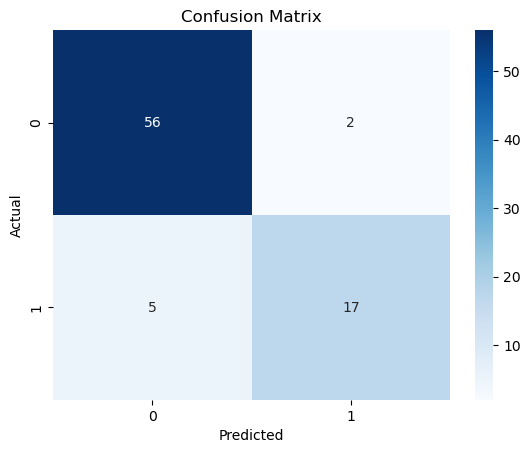

In [48]:
# Optional: Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()